# Analysis of Craigslist Vehicle Listings

By:  Guo, Rio (hg808) ; Li, Chen (cl4482) 
<br>
<br>
DATA Bootcamp, MBA Summer 2019 <br>
Leonard N. Stern School of Business <br>
New York University <br>

## 1. Introduction

### 1.1 Purpose of Analysis
Craiglist, an U.S. based advertisement website, is the world's largest marketplace of vehicles. Millions of people sell/buy cars from Craiglist everyday. Due to its marketplace nature, Craiglist listings are disorganized and the pricing could be particular confusing for shoppers. The purpose of this analysis is to explore the overall trend of Craiglist listings and determining factor of used vehicle prices on Craiglist.

### 1.2 Data Description
The original dataset was posted by Austin Reese on Kaggle. <br>
[Austin's Github](https://github.com/AustinReese1998) <br>
[Link to data](https://www.kaggle.com/austinreese/craigslist-carstrucks-data)

The original dataset posted by Austin contains over 170 millons rows and 26 columns of car listings in the U.S. scraped from Craiglist every few months. For the purpose of this project, a sample of 100,000 rows and 26 rows is used for  analysis.

The descriptions of all columns in the dataset are as folllowing:


| Column | Description |
| --- | --- |
| url | Link to listing  | 
| city | Craigslist region in which this listing was posted |
| city_url | Link to region page
| price | Price of vehicle
| year | Year of vehicle
| manufacturer | Manufacturer of vehicle
| make | Make of vehicle
| condition | Condition of vehicle
| cylinders | Number of cylinders of vehicle
| fuel | Fuel taken by vehicle
| odometer | Miles vehicle has been driven
| title_status | Title status of vehicle
| transmission | Transmission of vehicle
| VIN | Vehicle Identification Number
| drive | Drive of vehicle
| size | Size of vehicle
| type|Vehicle type
| paint_color|Color of vehicle
| image_url|Link to image of vehicle
| desc|Listing description provided by owner
| lat|Latitude of vehicle 
| long|Longitude of vehicle 
|county_fips|Federal Information Processing Standards code
|county_name|County of listing
|state_fips|Federal Information Processing Standards code
|state_code|2 letter state code
|state_name|State name
|weather|Historical average temperature for location in October/November

## 2. Imports

### 2.1 Packages
- _numpy and pandas_ for numeric computation
- _matplotlib and seaborn_ for plotting data
- _PCA_ for feature selection
- _StandardScaler_ for standarlization
- _train_test_split_ for training and testing the models
- _linear model_ for fitting linear models
- _cross_val_score_ for scoring models
- _RandomForestRegressor_ for modeling
- _KNeighborsRegressor_ for modeling
- _patsy_ for building matrices
- _PCA_ for selecting features

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import seaborn as sns

from sklearn.decomposition import PCA as pca
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor as rf
import patsy
from sklearn.decomposition import PCA as pca
from sklearn import neighbors

### 2.2 Data Import
Read in data from local path

In [2]:
vehicle = pd.read_csv('F:\db project\car.csv')


A quick glance at the data imported to plan out cleaning and filtering

In [3]:
vehicle.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,paint_color,image_url,lat,long,county_fips,county_name,state_fips,state_code,state_name,weather
0,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004.0,ford,taurus,good,6 cylinders,gas,168591,...,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.284500,-95.593000,19143.0,Osceola,19.0,IA,Iowa,47.0
1,https://marshall.craigslist.org/cto/d/2015-jee...,marshall,12500,2015.0,jeep,patriot high altitude,like new,4 cylinders,gas,39500,...,grey,https://images.craigslist.org/00404_RsUm4vwrGV...,43.548600,-96.633200,46099.0,Minnehaha,46.0,SD,South Dakota,38.0
2,https://soo.craigslist.ca/cto/d/2006-chev-expr...,soo,4000,2006.0,chev,express 2500 van,good,6 cylinders,gas,138000,...,white,https://images.craigslist.org/00J0J_fovkGAUCQI...,46.497529,-84.467464,NaN,NaN,NaN,NaN,FAILED,NaN
3,https://soo.craigslist.ca/cto/d/2002-chev-crew...,soo,13000,2002.0,chevrolet,2500 hd,excellent,8 cylinders,diesel,350000,...,white,https://images.craigslist.org/00V0V_bN5BoWGnSS...,46.497529,-84.467464,NaN,NaN,NaN,NaN,FAILED,NaN
4,https://soo.craigslist.ca/cto/d/2016-hyundai-s...,soo,21695,2016.0,hyundai,sonata,like new,4 cylinders,gas,44814,...,white,https://images.craigslist.org/00z0z_fLBdcucFWW...,46.517791,-84.342291,NaN,NaN,NaN,NaN,FAILED,NaN


In [4]:
vehicle.describe()

,price,year,odometer,lat,long,county_fips,state_fips,weather
count,1.000000e+05,99892.000000,1.000000e+05,100000.000000,100000.000000,85352.000000,85352.000000,85218.000000
mean,4.982242e+04,2005.890932,1.237129e+05,40.554603,-93.627543,28934.730340,28.851005,52.061853
std,5.960884e+06,10.080659,1.408269e+05,6.789972,18.170741,15767.764596,15.758246,7.988948
min,1.000000e+00,1900.000000,0.000000e+00,-84.810047,-166.115100,1001.000000,1.000000,29.000000
25%,3.900000e+03,2003.000000,6.750000e+04,36.166100,-98.535600,18141.000000,18.000000,48.000000
50%,7.995000e+03,2007.000000,1.170000e+05,40.444000,-86.786700,33003.000000,33.000000,50.000000
75%,1.597500e+04,2012.000000,1.630000e+05,43.744313,-81.667245,39119.000000,39.000000,59.000000
max,1.234568e+09,2019.000000,1.000000e+07,83.153111,29.513449,56045.000000,56.000000,79.000000


In [5]:
vehicle.shape

(100000, 26)

In [6]:
vehicle.nunique()

url             100000
city               467
price             5186
year                96
manufacturer        49
make             14429
condition            6
cylinders            8
fuel                 5
odometer         29424
title_status         6
transmission         3
vin              27178
drive                3
size                 4
type                13
paint_color         12
image_url        78422
lat              36351
long             36719
county_fips       2572
county_name       1545
state_fips          51
state_code          51
state_name          52
weather             26
dtype: int64

## 3. Data Cleaning

Check the number of nulls in each column

In [7]:
vehicle.isnull().sum()

url                 0
city                0
price               0
year              108
manufacturer     6007
make             2318
condition           0
cylinders        2169
fuel                0
odometer            0
title_status        0
transmission       16
vin             59717
drive               0
size                0
type                0
paint_color         0
image_url           0
lat                 0
long                0
county_fips     14648
county_name     14648
state_fips      14648
state_code      14648
state_name          0
weather         14782
dtype: int64

In [8]:
vehicle.count()

url             100000
city            100000
price           100000
year             99892
manufacturer     93993
make             97682
condition       100000
cylinders        97831
fuel            100000
odometer        100000
title_status    100000
transmission     99984
vin              40283
drive           100000
size            100000
type            100000
paint_color     100000
image_url       100000
lat             100000
long            100000
county_fips      85352
county_name      85352
state_fips       85352
state_code       85352
state_name      100000
weather          85218
dtype: int64

Check the percentage of nulls on each column

In [9]:
print(vehicle.isnull().sum()/vehicle.count())

url             0.000000
city            0.000000
price           0.000000
year            0.001081
manufacturer    0.063909
make            0.023730
condition       0.000000
cylinders       0.022171
fuel            0.000000
odometer        0.000000
title_status    0.000000
transmission    0.000160
vin             1.482437
drive           0.000000
size            0.000000
type            0.000000
paint_color     0.000000
image_url       0.000000
lat             0.000000
long            0.000000
county_fips     0.171619
county_name     0.171619
state_fips      0.171619
state_code      0.171619
state_name      0.000000
weather         0.173461
dtype: float64


As we can see from above, columns 'vin', 'county_fips', 'county_name', 'state_fips', 'state_code' and 'weather' have too many null (~15% or more), we decide to drop them. 

In [10]:
vehicle = vehicle.drop(['vin','county_fips','county_name','state_fips','state_code','weather'],axis=1)

Making sure no columns contain more than 10% nulls

In [11]:
vehicle = vehicle.dropna(thresh=len(vehicle)*0.9,axis=1)

Check the number of nulls after dropping nulls

In [12]:
vehicle.isnull().sum()

url                0
city               0
price              0
year             108
manufacturer    6007
make            2318
condition          0
cylinders       2169
fuel               0
odometer           0
title_status       0
transmission      16
drive              0
size               0
type               0
paint_color        0
image_url          0
lat                0
long               0
state_name         0
dtype: int64

Fill in nulls in 'year' with its mean

In [13]:
vehicle['year'] = vehicle['year'].fillna(int(vehicle['year'].mean())).astype(int)

We will be using 'cylinder' as a numerical feature so we fill in nulls in 'cylinder' with its mean

In [14]:
vehicle['cylinders'].value_counts()

6 cylinders     34664
8 cylinders     32207
4 cylinders     28615
5 cylinders      1075
10 cylinders      603
other             344
3 cylinders       239
12 cylinders       84
Name: cylinders, dtype: int64

In [15]:
vehicle['cylinders'] = vehicle['cylinders'].fillna('0')
vehicle['cylinders'] = vehicle['cylinders'].replace('other','0')
vehicle['cylinders'] = [x[:2] for x in vehicle['cylinders']]
vehicle['cylinders'] = vehicle['cylinders'].astype(int)

In [16]:
vehicle['cylinders'] = vehicle['cylinders'].replace(0,int(vehicle['cylinders'].mean()+0.5))

Note: 5-cylinder cars are rare in real life

In [17]:
vehicle['cylinders'].value_counts()

6     37177
8     32207
4     28615
5      1075
10      603
3       239
12       84
Name: cylinders, dtype: int64

For nulls in other columns, we can not predict them or fill them properly, thus, we drop them.

In [18]:
vehicle = vehicle.dropna()

Many people put 'dummy price' on Craiglist, such as '123456789' or '1', we would exclude them

In [19]:
vehicle = vehicle.loc[(vehicle['price']<200000)&(vehicle['price']>1000),:]

In [20]:
print(vehicle.isnull().sum())
print(vehicle.shape)

url             0
city            0
price           0
year            0
manufacturer    0
make            0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
size            0
type            0
paint_color     0
image_url       0
lat             0
long            0
state_name      0
dtype: int64
(87633, 20)


The cleaned dataset has 87633 rows and 20 columns with 0 nulls

## 4. Data Visualization

### 4.1 Luxury = Rare?

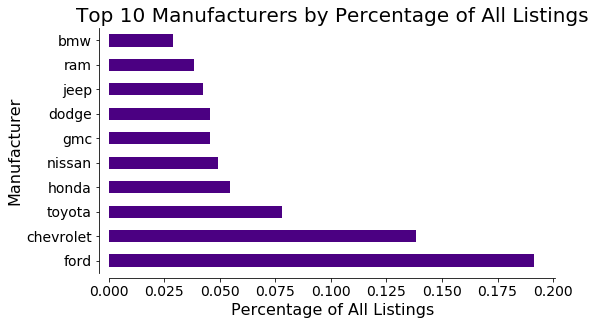

In [21]:
# calculate top 10 manufacturers by percentage of all listings
top10 = pd.DataFrame(vehicle.groupby('manufacturer'
        ).count()['url']/len(vehicle)).sort_values(by='url',ascending=False)

# plotting
fig,ax = plt.subplots()
top10.head(10).plot(ax=ax,
                    kind='barh',
                    figsize=(8,4.5),
                    rot=0,
                    fontsize=14,
                    color='indigo',
                    legend=False
                   )
# formatting
ax.set_title('Top 10 Manufacturers by Percentage of All Listings',size=20)
ax.set_ylabel('Manufacturer',size=16)
ax.set_xlabel('Percentage of All Listings',size=16)
ax.tick_params(labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',5))

**Insight:**<br>
As we can see from the plot,
9 out of
10 manufacturers on the list are regular brands. Moreover, these 9 manufacturers are exclusively either American or Japanese, which are known for making economic cars.<br>
<br>
The only luxury brand on the list is BMW. BMW has the second highest U.S. luxury car market share in 2018, behind Mercedes-Benz by merely 0.25%, per [Statista](https://www.statista.com/statistics/287620/luxury-vehicles-united-states-premium-vehicle-market-share/). Therefore, it makes sense to see BMW as the only luxury brand on this list. 
<br>
<br>
Furthermore, selling cars on Craiglist could take much more time and effort than selling/trading-in cars to dealers or other marketplaces. For owners who can afford luxury cars, they are less likely to afford time to sell cars on Craiglist.
<br>
<br>
Overeall, this figure conforms to the luxury versus regular car market share.

### 4.2 Is Craiglist a good place to find cheap cars?

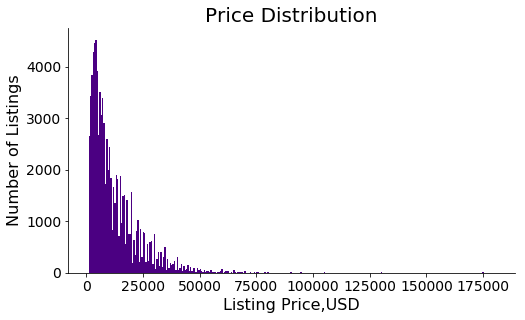

In [22]:
# plotting
fig,ax = plt.subplots()
vehicle['price'].plot(ax=ax,
                    kind='hist',
                    bins=300,
                    figsize=(8,4.5),
                    rot=0,
                    fontsize=14,
                    color='indigo',
                    legend=False
                   )
# formatting
ax.set_title('Price Distribution',size=20)
ax.set_ylabel('Number of Listings',size=16)
ax.set_xlabel('Listing Price,USD',size=16)
ax.tick_params(labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [23]:
print('The percentage of vehicles whose price is lower than 25000:',round((vehicle.loc[vehicle['price']<25000,:]['url'].count())/len(vehicle)*100,2),'%')

The percentage of vehicles whose price is lower than 25000: 88.31 %


In [24]:
print('The percentage of vehicles whose price is lower than 10000:',round((vehicle.loc[vehicle['price']<10000,:]['url'].count())/len(vehicle)*100,2),'%')

The percentage of vehicles whose price is lower than 10000: 57.1 %


In [25]:
print('The percentage of vehicles whose price is higher than 75000:',round((vehicle.loc[vehicle['price']>75000,:]['url'].count())/len(vehicle)*100,2),'%')

The percentage of vehicles whose price is higher than 75000: 0.2 %


**Insight:**<br>
Yes, Craiglist is a good place find cheap cars or deals, if not the best. As we can see from the plot and calculation above, almost 90% of  listings are priced below \\$25,000 while more than a half listings are priced below \\$10,000. If you have a budget below \\$25,000, Craiglist will provide a great selection of used cars.
<br>
<br>
Above \\$75,000 there are few listings, which are mostly exotic cars or collectible vintage cars. Craiglist would also be a good place to browse if you are looking for something rare.


### 4.3 How old are these used cars?

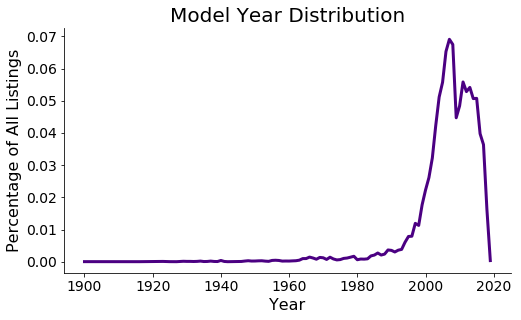

In [26]:
# calculate model year distribution by percentage of all listings
year_dist = vehicle.groupby('year').count()['url']/len(vehicle)

# plotting
fig,ax = plt.subplots()
year_dist.plot(ax=ax,
               kind='line',
               figsize=(8,4.5),
               rot=0,
               fontsize=14,
               color='indigo',
               linewidth=3)
# Formatting
ax.set_title('Model Year Distribution',size=20)
ax.set_ylabel('Percentage of All Listings',size=16)
ax.set_xlabel('Year',size=16)
ax.tick_params(labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [27]:
# percentage of vehicles from year 2000 or newer
print('The percentage of vehicles from year 2000 or newer:',round(vehicle.loc[(vehicle['year']>=2000),:]['url'].count()/len(vehicle)*100,2),'%')

The percentage of vehicles from year 2000 or newer: 88.16 %


In [28]:
# percentage of vehicles from year 2010 or newer
print('The percentage of vehicles from year 2010 or newer:',round(vehicle.loc[(vehicle['year']>=2010),:]['url'].count()/len(vehicle)*100,2),'%')

The percentage of vehicles from year 2010 or newer: 40.54 %


In [29]:
# percentage of vehicles from year 2015 or newer
print('The percentage of vehicles from year 2015 or newer:',round(vehicle.loc[(vehicle['year']>=2015),:]['url'].count()/len(vehicle)*100,2),'%')

The percentage of vehicles from year 2015 or newer: 14.35 %


**Insight:**<br>
Craiglist have cars from early 20th century to year 2019 listed for sale. However, 90% of cars are made post 2000 while 40% cars are made in the past ten years and 15% of cars are from the past five years.
<br>
<br>
From the plot, we can also see that the line runs flat from 1900 all the way to 1980 since most cars from this period are either outdated or scraped. 

### 4.4 Old but Gold

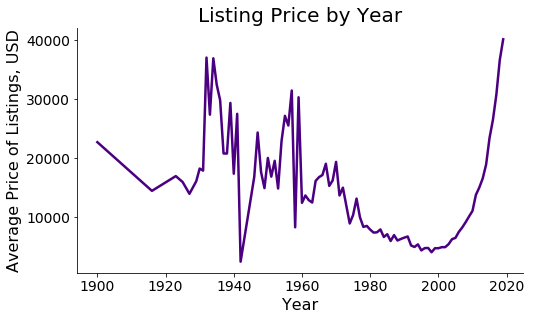

In [30]:
# plotting
fig,ax = plt.subplots()
vehicle.groupby('year')['price'].mean().plot(ax=ax,
                                             kind='line',
                                             figsize=(8,4.5),
                                             rot=0,
                                             fontsize=14,
                                             color='indigo',
                                             linewidth=2.5)
# formatting
ax.set_title('Listing Price by Year',size=20)
ax.set_ylabel('Average Price of Listings, USD',size=16)
ax.set_xlabel('Year',size=16)
ax.tick_params(labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

**Insight:**<br>
From the plots, vehicle prices flucuate significantly from 1900 to 2000 with lots of noises and a slightly decreasing trend as year increases. Lisitings from year 1900 to 1980 are combined with vintage/collectible cars and purely old cars. Also, there are very few pre-1980 listings so the price spikes up and down.  
<br>
We can also see that the line runs flat from 1900 all the way to 1980 since most cars from this period are either outdated or scraped. 

### 4.5 Size Matters

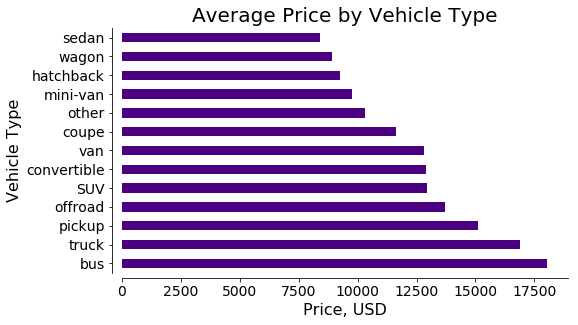

In [31]:
price_size = vehicle.groupby('type')['price'].mean().sort_values(ascending=False)

# plotting
fig,ax = plt.subplots()
price_size.plot(ax=ax,
                kind='barh',
                figsize=(8,4.5),
                rot=0,
                fontsize=14,
                color='indigo')

# formatting
ax.set_title('Average Price by Vehicle Type',size=20)
ax.set_ylabel('Vehicle Type',size=16)
ax.set_xlabel('Price, USD',size=16)
ax.tick_params(labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',5))

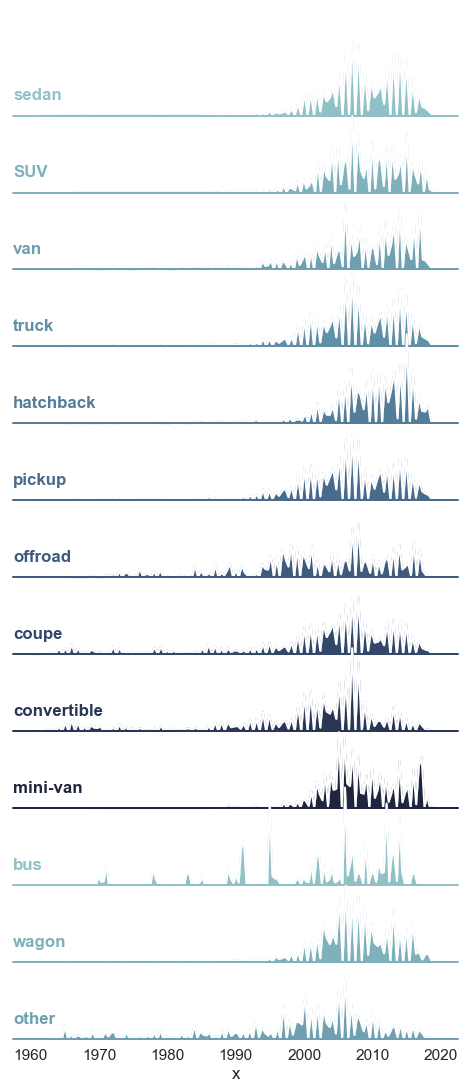

In [32]:
sns.set(style="white", rc={"axes.facecolor": (0, 1, 0, 0)},font_scale=1.4) 

# create the data
vehicleplot = vehicle.loc[vehicle['year']>1960]
g = np.array(vehicleplot['type']) 
x = np.array(vehicleplot['year'])   
df = pd.DataFrame(dict(x=x, g=g))

# initialize the facetgrid 
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, aspect=6,  
                  row="g", hue="g", height=1.2, 
                  palette=pal)

# draw the densities
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,ha="left", va="center", transform=ax.transAxes)

g.map(label,'x')

# set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)
# remove axes details
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.show()

**Insight:**<br>
Yes, we have confirmed that buses are more expensive than sedans.  
<br>
This would be helpful for people looking for cars so they can have a quick idea about the price of types of vehicle they are looking for.

### 4.6 Four equals to two times two

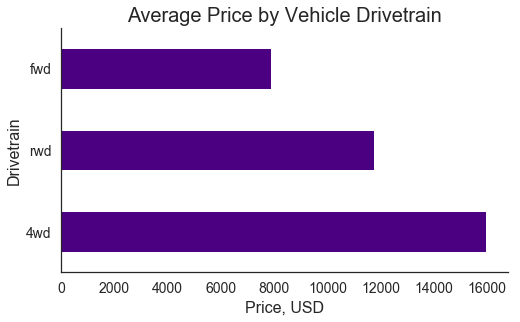

In [33]:
price_type = vehicle.groupby('drive')['price'].mean().sort_values(ascending=False)

# plotting
fig,ax = plt.subplots()
price_type.plot(ax=ax,
                kind='barh',
                figsize=(8,4.5),
                rot=0,
                fontsize=14,
                color='indigo')

# formatting
ax.set_title('Average Price by Vehicle Drivetrain',size=20)
ax.set_ylabel('Drivetrain',size=16)
ax.set_xlabel('Price, USD',size=16)
ax.tick_params(labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

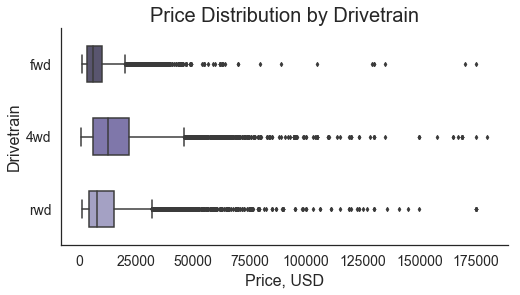

In [34]:
fig,ax = plt.subplots(figsize=(8,4))
sns.boxplot(ax=ax,
            x=vehicle['price'], 
            y=vehicle['drive'], 
            data=vehicle,
            palette='Purples_d',
            width=0.5,
            fliersize=3)

ax.set_title('Price Distribution by Drivetrain',size=20)
ax.set_ylabel('Drivetrain',size=16)
ax.set_xlabel('Price, USD',size=16)
ax.tick_params(labelsize=14)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

**Insight:**<br>
Drivetrain makes a big difference in price based on our data. Cars that have four-wheel-drive drivetrain, which potentially adds stability and off-road capbility to a vehicle, are averagely priced two times as much front-wheel-drive cars.
<br>
<br>
Most everyday vehicles are front-wheel-drive cars so the
<br>
<br>
Rear-wheel-drive cars, probably the most rare among all three types of drivetrain, are generally sports cars.

# 4.7

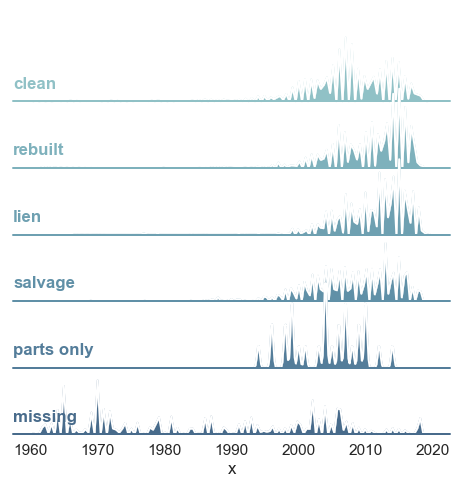

In [35]:
sns.set(style="white", rc={"axes.facecolor": (0, 1, 0, 0)},font_scale=1.4) 

# Create the data
vehicleplot = vehicle.loc[vehicle['year']>1960]
g = np.array(vehicleplot['title_status'])  
x = np.array(vehicleplot['year'])       
df = pd.DataFrame(dict(x=x, g=g))

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, aspect=6,  
                  row="g", hue="g", height=1.2,  
                  palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "x", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, "x", clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)

g.map(label,'x')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)
# Remove axes details that don't play well with overlap
g.set_titles('')
g.set(yticks=[])
g.despine(bottom=True, left=True)
plt.show()

# 4.8

Here is a wordcloud showing the most populated manufacturers on Craiglist used-car listing. We can find out ford, chevrolet, toyota, nissan, and honda have the call.

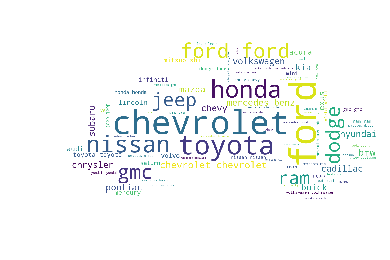

<Figure size 3600x3600 with 0 Axes>

In [36]:
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
import imageio

# read file
text = open('F:\data.txt','r').read()

# read background
bg_pic = imageio.imread('F:\db project\car.png')

# generate wordcloud
wordcloud = WordCloud(mask=bg_pic,background_color='white',scale=3).generate(text)

image_colors = ImageColorGenerator(bg_pic)

# show wordcloud
plt.imshow(wordcloud)
plt.axis('off')
plt.figure(figsize=(50,50))
plt.show()


## 5. Model Building and Fitting

### 5.1 Conversion of Categerical Variables to Numerical

To deal with categorical data, we first came out with the idea to manually turn categorical features into numerical values.

In [37]:
vehicle.head()

,url,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,image_url,lat,long,state_name
0,https://marshall.craigslist.org/cto/d/ford-tau...,marshall,2800,2004,ford,taurus,good,6,gas,168591,clean,automatic,fwd,full-size,sedan,grey,https://images.craigslist.org/00L0L_5HUR1nQjt8...,43.284500,-95.593000,Iowa
1,https://marshall.craigslist.org/cto/d/2015-jee...,marshall,12500,2015,jeep,patriot high altitude,like new,4,gas,39500,rebuilt,automatic,4wd,sub-compact,SUV,grey,https://images.craigslist.org/00404_RsUm4vwrGV...,43.548600,-96.633200,South Dakota
2,https://soo.craigslist.ca/cto/d/2006-chev-expr...,soo,4000,2006,chev,express 2500 van,good,6,gas,138000,clean,automatic,rwd,full-size,van,white,https://images.craigslist.org/00J0J_fovkGAUCQI...,46.497529,-84.467464,FAILED
3,https://soo.craigslist.ca/cto/d/2002-chev-crew...,soo,13000,2002,chevrolet,2500 hd,excellent,8,diesel,350000,clean,automatic,4wd,full-size,truck,white,https://images.craigslist.org/00V0V_bN5BoWGnSS...,46.497529,-84.467464,FAILED
4,https://soo.craigslist.ca/cto/d/2016-hyundai-s...,soo,21695,2016,hyundai,sonata,like new,4,gas,44814,clean,other,fwd,full-size,sedan,white,https://images.craigslist.org/00z0z_fLBdcucFWW...,46.517791,-84.342291,FAILED


In [38]:
vehiclepre = vehicle.copy(deep=True)

We are leaving out city and state because we are incorporating longtitude and latitude for location. Listing url and images are left out as well. Excluding detailed vehicles makes as well.

In [39]:
vehiclepre = vehiclepre.drop(['url','city','make','image_url','state_name'],axis=1)

All catagorical variables will be replaced with its average price. For example, Jeep cars will have a 14108.720569 replace its manufacturer 'jeep'.

Manufacturer

In [40]:
vehiclepre.groupby('manufacturer')['price'].mean().sort_values()

manufacturer
saturn              3634.433180
mercury             4519.372792
landrover           4933.333333
pontiac             6171.700951
mercedesbenz        6500.000000
volvo               7375.745000
datsun              7643.750000
chrysler            7837.681650
buick               7877.334403
alfa                8008.636364
honda               8493.905142
mazda               8600.363112
vw                  8785.566964
volkswagen          9725.828082
mini                9738.204678
chevy               9950.888767
hyundai             9973.100257
chev               10044.463415
nissan             10291.230375
subaru             10496.229577
lincoln            10636.511111
acura              10783.201622
kia                10988.115213
mitsubishi         11200.464828
alfa-romeo         11479.500000
jaguar             11722.460251
dodge              11747.014824
toyota             11932.206664
fiat               12466.548387
lexus              12574.631535
chevrolet          12631.86

In [41]:
for i in vehiclepre['manufacturer'].unique():
     vehiclepre['manufacturer'] = vehiclepre['manufacturer'].replace(i,vehicle.loc[vehicle['manufacturer']==i,'price'].mean())

Condition

In [42]:
vehicle.groupby('condition')['price'].mean().sort_values()

condition
fair          3192.275939
good          7867.704548
salvage      10287.338798
excellent    13714.314370
like new     20077.864812
new          28873.161145
Name: price, dtype: float64

In [43]:
for i in vehiclepre['condition'].unique():
     vehiclepre['condition'] = vehiclepre['condition'].replace(i,vehicle.loc[vehicle['condition']==i,'price'].mean())

Title Status

In [44]:
vehicle.groupby('title_status')['price'].mean().sort_values()

title_status
parts only     5350.344828
missing        6033.529032
salvage        8578.123288
rebuilt       11552.484970
clean         12236.166470
lien          19057.687651
Name: price, dtype: float64

In [45]:
for i in vehiclepre['title_status'].unique():
     vehiclepre['title_status'] = vehiclepre['title_status'].replace(i,vehicle.loc[vehicle['title_status']==i,'price'].mean())

Fuel Type

In [46]:
vehicle.groupby('fuel')['price'].mean().sort_values()

fuel
gas         11491.848971
other       12406.737864
hybrid      13164.718475
electric    20493.555556
diesel      22020.639185
Name: price, dtype: float64

In [47]:
for i in vehiclepre['fuel'].unique():
     vehiclepre['fuel'] = vehiclepre['fuel'].replace(i,vehicle.loc[vehicle['fuel']==i,'price'].mean())

Drivetrain

In [48]:
vehicle.groupby('drive')['price'].mean().sort_values()

drive
fwd     7872.474674
rwd    11761.288528
4wd    15961.392015
Name: price, dtype: float64

In [49]:
for i in vehiclepre['drive'].unique():
     vehiclepre['drive'] = vehiclepre['drive'].replace(i,vehicle.loc[vehicle['drive']==i,'price'].mean())

Size

In [50]:
vehicle.groupby('size')['price'].mean().sort_values()

size
sub-compact     8830.654852
compact         9026.880311
mid-size       10734.591901
full-size      13948.633254
Name: price, dtype: float64

In [51]:
for i in vehiclepre['size'].unique():
     vehiclepre['size'] = vehiclepre['size'].replace(i,vehicle.loc[vehicle['size']==i,'price'].mean())

Vehicle Type

In [52]:
vehicle.groupby('type')['price'].mean().sort_values()

type
sedan           8409.311239
wagon           8903.103278
hatchback       9234.850897
mini-van        9780.566282
other          10297.203971
coupe          11647.065271
van            12836.596587
convertible    12902.527523
SUV            12960.279246
offroad        13724.349345
pickup         15093.450311
truck          16895.875318
bus            18033.561798
Name: price, dtype: float64

In [53]:
for i in vehiclepre['type'].unique():
     vehiclepre['type'] = vehiclepre['type'].replace(i,vehicle.loc[vehicle['type']==i,'price'].mean())

Transmission

In [54]:
vehicle.groupby('transmission')['price'].mean().sort_values()

transmission
manual       10472.238043
other        11099.381773
automatic    12465.073939
Name: price, dtype: float64

In [55]:
for i in vehiclepre['transmission'].unique():
     vehiclepre['transmission'] = vehiclepre['transmission'].replace(i,vehicle.loc[vehicle['transmission']==i,'price'].mean())

Color

In [56]:
vehicle.groupby('paint_color')['price'].mean().sort_values()

paint_color
green      7556.994161
brown      9388.335014
blue      10039.282138
purple    10527.168022
silver    10645.433657
custom    10701.120236
yellow    10935.612686
red       11154.595214
orange    12465.017176
grey      12841.302766
black     14070.856323
white     14713.280203
Name: price, dtype: float64

In [57]:
for i in vehiclepre['paint_color'].unique():
     vehiclepre['paint_color'] = vehiclepre['paint_color'].replace(i,vehicle.loc[vehicle['paint_color']==i,'price'].mean())

Categorical variables now have been transformed to numerical. Numerical variables (year, cylinders, odometer, lat, long) ramained unchanged

In [58]:
vehiclepre.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,lat,long
0,2800,2004,13241.383790,7867.704548,6,11491.848971,168591,12236.16647,12465.073939,7872.474674,13948.633254,8409.311239,12841.302766,43.284500,-95.593000
1,12500,2015,14108.720569,20077.864812,4,11491.848971,39500,11552.48497,12465.073939,15961.392015,8830.654852,12960.279246,12841.302766,43.548600,-96.633200
2,4000,2006,10044.463415,7867.704548,6,11491.848971,138000,12236.16647,12465.073939,11761.288528,13948.633254,12836.596587,14713.280203,46.497529,-84.467464
3,13000,2002,12631.866898,13714.314370,8,22020.639185,350000,12236.16647,12465.073939,15961.392015,13948.633254,16895.875318,14713.280203,46.497529,-84.467464
4,21695,2016,9973.100257,20077.864812,4,11491.848971,44814,12236.16647,11099.381773,7872.474674,13948.633254,8409.311239,14713.280203,46.517791,-84.342291


Here is a overview of the correlation among features. Condition and year are the biggest factors comes to price. It is also interesting to see how longitudes and latitude come into affect the price as well. 

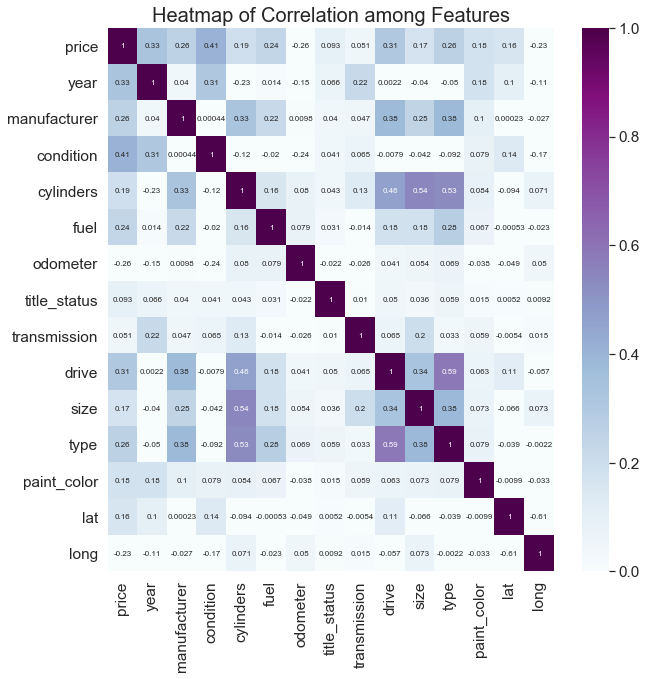

In [59]:
fig, ax = plt.subplots(figsize=(10,10))
plt.title("Heatmap of Correlation among Features",fontsize=20)
cmap = sns.diverging_palette(100, 0, as_cmap=True)
sns.heatmap(vehiclepre.corr(),vmin=0,vmax=1,
            cmap='BuPu',annot=True,annot_kws={"size": 8})
plt.show()

Now we specify x and y 

In [60]:
x = vehiclepre.drop(['price'],axis=1)
y = vehiclepre['price']

All independent variables will be standardized so both our numerical and transformed categorical variables will be on the same scale

In [61]:
# standardization
std = StandardScaler()
x_std = std.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### 5.2 Feature Selection

Now, we will use princial component analysis (PCA) to select features.

In [62]:
# PCA
pca = pca()
pca.fit(x_std)
print(pca.explained_variance_ratio_)

[0.20624664 0.13501445 0.10093805 0.07496309 0.07189826 0.06976785
 0.06325998 0.0563228  0.05216109 0.04696994 0.04119551 0.03167006
 0.02533216 0.02426011]


We will drop the variables based on a variance threshold of 5%

In [63]:
vehiclepost = vehiclepre.drop(['size','type','paint_color','lat','long'],axis=1)
vehiclepost.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive
0,2800,2004,13241.383790,7867.704548,6,11491.848971,168591,12236.16647,12465.073939,7872.474674
1,12500,2015,14108.720569,20077.864812,4,11491.848971,39500,11552.48497,12465.073939,15961.392015
2,4000,2006,10044.463415,7867.704548,6,11491.848971,138000,12236.16647,12465.073939,11761.288528
3,13000,2002,12631.866898,13714.314370,8,22020.639185,350000,12236.16647,12465.073939,15961.392015
4,21695,2016,9973.100257,20077.864812,4,11491.848971,44814,12236.16647,11099.381773,7872.474674


Specify x and y

In [64]:
x = vehiclepost.drop(['price'],axis=1)
y = vehiclepost['price']

In [65]:
# standardization
std = StandardScaler()
x_std = std.fit_transform(x)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [66]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2)

### 5.3 Linear Regression

In [67]:
model_LR = LinearRegression()
model_LR.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [68]:
model_LR.coef_

array([ 2927.66890812,  1087.11560895,  3612.71313733,  1903.99549235,
        2040.84718936, -2149.96316029,   385.48431696,  -698.82935785,
        2031.60026336])

In [69]:
# specify y axis tick labels 
ytick = pd.DataFrame(vehiclepre.columns).iloc[1:10,0]

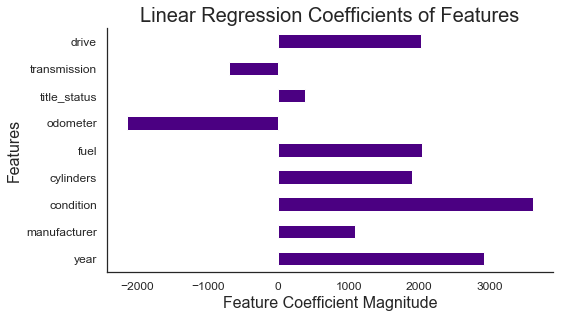

In [70]:
# plotting
fig,ax = plt.subplots()
pd.DataFrame(model_LR.coef_).plot(ax=ax,
                kind='barh',
                figsize=(8,4.5),
                fontsize=14,
                color='indigo',
                legend=False)
# formatting
ax.set_title('Linear Regression Coefficients of Features',size=20)
ax.set_xlabel('Feature Coefficient Magnitude',size=16)
ax.set_ylabel('Features',size=16)
ax.set_yticklabels(ytick)
ax.tick_params(labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [71]:
result_lr = model_LR.fit(x_train,y_train).predict(x_test)
residual_lr = ((result_lr - y_test)/y_test).mean()
residual_lr

0.37958803312964157

In [72]:
cross_val_score(model_LR,x_train,np.ravel(y_train),cv=5).mean()

0.4066299374078257

### 5.4 Ridge Regression

In [73]:
model_ridge = Ridge(alpha=1.5)
model_ridge.fit(x_train,y_train)

Ridge(alpha=1.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [74]:
model_ridge.coef_

array([ 2927.60659325,  1087.12713131,  3612.65169305,  1903.935593  ,
        2040.81101507, -2149.93139664,   385.48691266,  -698.78862158,
        2031.58208889])

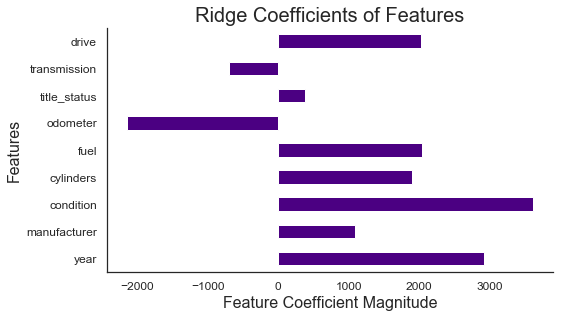

In [75]:
# plotting
fig,ax = plt.subplots()
pd.DataFrame(model_ridge.coef_).plot(ax=ax,
                kind='barh',
                figsize=(8,4.5),
                fontsize=14,
                color='indigo',
                legend=False)
                                     

# formatting
ax.set_title('Ridge Coefficients of Features',size=20)
ax.set_xlabel('Feature Coefficient Magnitude',size=16)
ax.set_ylabel('Features',size=16)
ax.set_yticklabels(ytick)
ax.tick_params(labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [76]:
result_rg = model_ridge.fit(x_train,y_train).predict(x_test)
residual_rg = ((result_rg - y_test)/y_test).mean()
residual_rg

0.3795997392269821

In [77]:
cross_val_score(model_ridge,x_train,np.ravel(y_train),cv=5).mean()

0.40663031363005475

### 5.5 Lasso Regression

In [78]:
model_lasso = linear_model.Lasso()
model_lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
model_lasso.coef_

array([ 2926.43129166,  1086.79630382,  3612.05889465,  1902.73561576,
        2040.138357  , -2149.11007457,   384.68138381,  -697.31259394,
        2031.33867252])

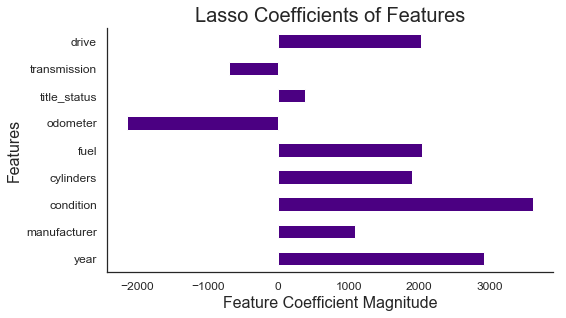

In [80]:
# plotting
fig,ax = plt.subplots()
pd.DataFrame(model_lasso.coef_).plot(ax=ax,
                kind='barh',
                figsize=(8,4.5),
                fontsize=14,
                color='indigo',
                legend=False)
                                     

# formatting
ax.set_title('Lasso Coefficients of Features',size=20)
ax.set_xlabel('Feature Coefficient Magnitude',size=16)
ax.set_ylabel('Features',size=16)
ax.set_yticklabels(ytick)
ax.tick_params(labelsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [81]:
result_ls = model_lasso.fit(x_train,y_train).predict(x_test)
residual_ls = ((result_ls - y_test)/y_test).mean()
residual_ls

0.3798078739290269

In [82]:
cross_val_score(model_lasso,x_train,np.ravel(y_train),cv=5).mean()

0.4066336093077213

As we can see, all the linear models behave more or less the same. Even though we replaced catagorical values with numerical values, essentially they are still discrete therefore behave poorly under linear models.

### 5.6 K-Nearest Neighbor

In [83]:
knn = neighbors.KNeighborsRegressor(15)
result_knn = knn.fit(x_train,y_train).predict(x_test)
cross_val_score(knn,x_train,np.ravel(y_train),cv=5).mean()

0.7436429677820268

In [84]:
residual_knn = ((result_knn - y_test)/y_test).mean()
residual_knn

0.1811206583695274

In [85]:
for i in range(3,10,1):
    knn = neighbors.KNeighborsRegressor(i)
    result_knn = knn.fit(x_train,y_train).predict(x_test)
    residual_knn = ((result_knn - y_test)/y_test).mean()
    print(i,residual_knn)

3 0.14830689129100433
4 0.15564782508248065
5 0.16172871297191171
6 0.16318872953855332
7 0.16500149585627333
8 0.1677389320334101
9 0.1702706295367589


KNN model with 3 neighbors will yield the best fitting with a 14% difference from y_test. We try to find a better n and the results of the loop indicate that with increasing n, the residual increases. Thus, we believe 3 is the best.

### 5.7 Random Forest

In [86]:
cross_val_score(rf(n_estimators=100),x_train,np.ravel(y_train),cv=5).mean()

0.8172951105559176

In [87]:
result_rf = rf(n_estimators=100).fit(x_train,y_train).predict(x_test)

In [88]:
residual_rf = ((result_rf - y_test)/y_test).mean()
residual_rf

0.14143871436611288

Similarly, random forest model with n_estimators=3 will yield the best fitting with a 14% difference from y_test.

Overall, we can see that knn and random forest results are much better than the linear models.

## 6. Model Optimization

### 6.1 Patsy

We will use patsy to build matrice for its convenience of coding categorical variables, including automatic detecction and removal of redundancies.

In [100]:
y, X = patsy.dmatrices('price ~ year+condition+cylinders+fuel+odometer+title_status+drive+manufacturer+size+type+ paint_color+lat+long+transmission',vehicle)

In [101]:
# standardization
std = StandardScaler()
x_std = std.fit_transform(X)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x_std, y, test_size = 0.2)

### 6.2 Lasso Regression

In [103]:
model_lasso = linear_model.Lasso()
model_lasso.fit(x_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
result = model_lasso.predict(x_test)
lasso_err = ((pd.DataFrame(result) - pd.DataFrame(y_test))/y_test).mean()
lasso_err

0    0.337167
dtype: float64

In [105]:
cross_val_score(model_lasso,x_train,np.ravel(y_train),cv=5).mean()

0.4477118179387555

Lasso yields a 36% variance from y_test since it's still a linear model.

### 6.3 K-Nearest Neighbor

In [ ]:
knn = neighbors.KNeighborsRegressor(5)
result_knn = knn.fit(x_train,y_train).predict(x_test)

In [ ]:
cross_val_score(knn,x_train,np.ravel(y_train),cv=5).mean()

In [ ]:
residual_knn = ((pd.DataFrame(result_knn) - pd.DataFrame(y_test))/y_test).mean()
residual_knn

In [ ]:
for i in range(3,10,1):
    knn = neighbors.KNeighborsRegressor(i)
    result_knn = knn.fit(x_train,y_train).predict(x_test)
    residual_knn = ((pd.DataFrame(result_knn) - pd.DataFrame(y_test))/y_test).mean()
    print(i,residual_knn)

### 6.4 Random Forest

In [ ]:
cross_val_score(rf(n_estimators=100),x_train,np.ravel(y_train),cv=5).mean()

In [ ]:
result_rf = rf(n_estimators=100).fit(x_train,np.ravel(y_train)).predict(x_test)

In [ ]:
x_test


In [ ]:
residual_rf = ((pd.DataFrame(result_rf) - pd.DataFrame(y_test))/y_test).mean()
residual_rf

Among all models above, random forest has the best performance.

## 7. Summary and Conclusion

We were originally going to analyze the data and come up with a vehicle valuation model for craiglist (pretty much a Kelley Blue Book for cars on Craiglist). Since the original data is heavily catagorical, we attempted to convert them into numerical but the models did not turn out great. Then, we came up with the idea that using patsy to convert catagorical data into numerical data, and finally find out random forest is the best model and the overall residual rate is 13%.

For the models, KNN and random forest have better performance than the linear models such as linear regression, ridge and lasso in both methods. One possible reason is that although being converted to numerical data, the catagorical data is still highly discrete and we can see from the pairplot there is not obvious linear relationship between price and other features.

We believe that a 85% cross_val_score and 13% residual rate is acceptable during price prediction.